In [4]:
%pip install numpy matplotlib seaborn pandas


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
import numpy as np

NUM_STEPS = 1000 # time steps
NUM_RUNS = 2000
epsilon = 0.1

def run_k_bandit_experiment(k, epsilon):
    all_rewards = np.zeros((NUM_RUNS, NUM_STEPS))
    all_actions = np.zeros((NUM_RUNS, NUM_STEPS))

    for run in range(NUM_RUNS):
        # True action values for this run (sampled once per run)
        q_true = np.random.normal(loc=0, scale=1, size=k)

        Q = np.zeros(k) # average reward for each action within a given run
        N = np.zeros(k) # number of times each action has been taken within a given run
        for step in range(NUM_STEPS):
            if np.random.rand() < epsilon:
                # explore
                action = np.random.randint(0, k)
            else:
                # exploit
                action = np.argmax(Q)
            
            all_actions[run, step] += 1 if action == np.argmax(q_true) else 0
            
            reward = np.random.normal(loc=q_true[action], scale=1)
            all_rewards[run, step] = reward
            # update the number of times the action has been taken
            N[action] += 1
            # updates the current reward for action TOWARDS the sampled reward by calculating the sample-average
            Q[action] += (reward - Q[action]) / N[action]

    return all_rewards.mean(axis=0), all_actions.mean(axis=0)

In [78]:
run_k_bandit_experiment(10, 0.01)

(array([-0.06993145,  0.25281218,  0.41794172,  0.54046365,  0.56267038,
         0.65574532,  0.6973018 ,  0.75687784,  0.79482932,  0.83926097,
         0.88418887,  0.89460637,  0.87311813,  0.88230327,  0.8800422 ,
         0.93166058,  0.93529071,  0.92462455,  0.92620694,  0.90858419,
         0.93199021,  0.96557422,  0.94848247,  0.94397311,  0.94952107,
         0.96594909,  0.9911471 ,  1.00092858,  0.97491084,  0.98355214,
         0.97136197,  0.97728701,  1.01036659,  0.98608445,  0.99375603,
         0.99068602,  1.00075865,  1.01097856,  0.96625939,  0.99886853,
         1.00089387,  0.99599276,  1.02136357,  0.99967196,  0.99873318,
         1.00240148,  1.00060953,  1.00800351,  0.97467464,  1.00201258,
         1.02598808,  1.01700448,  1.03776855,  1.01587577,  1.04728507,
         1.04424858,  1.02356235,  1.04958402,  1.02705272,  1.02604544,
         1.03636714,  0.97361568,  1.01260244,  1.03612213,  1.01117665,
         1.04201214,  1.03872422,  1.04275703,  0.9

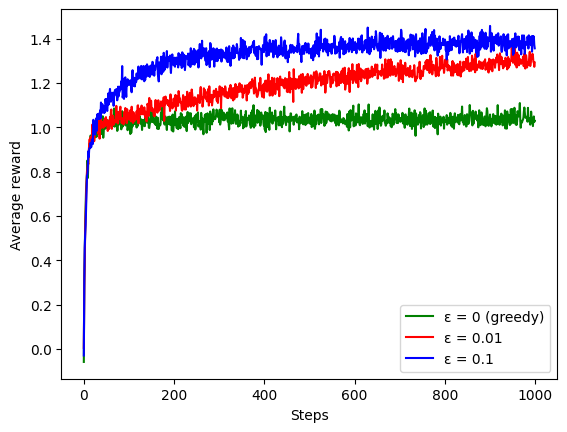

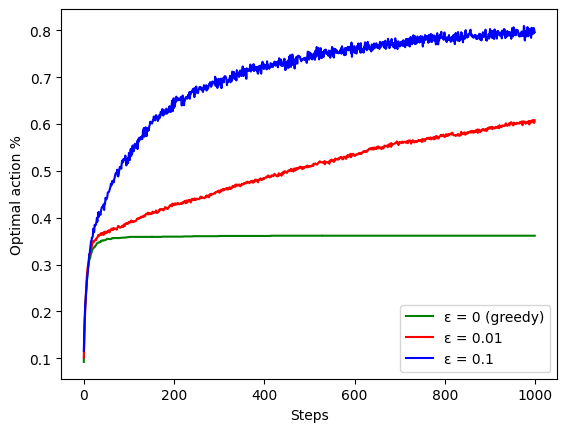

In [79]:
import matplotlib.pyplot as plt

k = 10

for eps, color in [(0, 'green'), (0.01, 'red'), (0.1, 'blue')]:
    avg_rewards, avg_action_choices = run_k_bandit_experiment(k, eps)
    label = f'ε = {eps}' if eps > 0 else 'ε = 0 (greedy)'

    # Plot average rewards
    plt.figure(1)
    plt.plot(avg_rewards, color=color, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.legend()

    # Plot % optimal action taken
    plt.figure(2)
    plt.plot(avg_action_choices, color=color, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Optimal action %')
    plt.legend()
